This Python program plots the concentration changes of components in a CSTR reactor using solve_ivp.

A reaction system in a single CSTR is as following:

\begin{align*}
\ce{BrO3- + Br- &-> HBrO2 + HOBr}\\
\ce{HBrO2 + Br- &-> 2HOBr}\\
\ce{BrO3- + HBrO2 &-> 2HBrO2 + M^+}\\
\ce{2HBrO2 &-> BrO3- + HOBr}\\
\ce{M^+ &-> Br-}
\end{align*}

Where the reaction rates are: \\
$k_1 = 1.34 [1/Ms], \\
k_2 = 1.6\times 10^9 [1/Ms], \\
k_3 = 8\times 10^3 [1/Ms], \\
k_4 = 4 \times 10^7 [1/M/s], \\
k_5 = 1 [1/s]$.



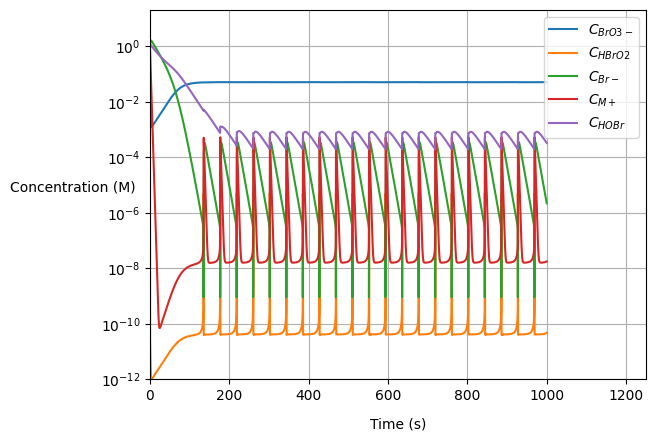

In [13]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# defining stoichiometry
stoichiometric_matrix = np.array([[-1,1,-1,0,1],
                                [0,-1,-1,0,2],
                                [-1,1,0,1,0],
                                [1,-2,0,0,1],
                                [0,0,1,-1,0]])


# defining reaction rates
def reaction_rates(C, k):
  C_A, C_X, C_Y, C_Z, C_P = C
  k1, k2, k3, k4, k5 = k
  r = [k1*C_A*C_Y,
       k2*C_X*C_Y,
       k3*C_A*C_X,
       k4*C_X*C_X,
       k5*C_Z]
  return r


# calculates the consumption rate using reaction rates and stoichiometry
def generation_consumption_rate(C, k):
  r = reaction_rates(C, k)
  R = (stoichiometric_matrix.T)@r
  return R

def differential_equation_system(t, C, k, Cin, nu, V):
  R = generation_consumption_rate(C, k)
  dCdt = R+(nu/V)*(Cin-C)
  return dCdt

#time span
t_span = [0,1000]

#CSTR parameters
V = 100
nu = 5
Cin = np.array([0.05,0,0,0,0])

#rate constants
k = [1.34, 1.6e9, 8e3, 4e7, 1]

#Initial conditions
y0 = np.array([0.05,0.02,1,1,1])

#Solving for concentrations
sol = solve_ivp(differential_equation_system,t_span,y0,method='LSODA',rtol=1e-12,atol=1e-12,args=(k, Cin, nu, V)) # fill this in

plt.semilogy(sol.t, sol.y.T)

plt.axis([0,1250,1e-12,2e1])
plt.legend(['$C_{BrO3-}$','$C_{HBrO2}$','$C_{Br-}$','$C_{M+}$','$C_{HOBr}$'], loc =1)
plt.grid()
plt.xlabel('Time (s)', labelpad=10)
plt.ylabel('Concentration (M)',  labelpad=20, rotation=0)
plt.show()

We can see that the concentrations oscillate at constant magnitudes, indicating that the system reaches a state of stable oscillation.